# Regressão Logística Binária

Para está atividade iremos utilizar um dataset sobre fraudes em cartão de crédito obtido do [kaggle](https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud?select=card_transdata.csv).

Esse conjunto de dados possui as variáveis:

* distance_from_home - distância entre a casa e o local onde a transação foi feita.

* distance_from_last_transaction - a distância do local em que a última transação ocorreu.

* ratio_to_median_purchase_price - Razão entre preço da transação e o preço médio de transação.

* repeat_retailer - Se a transação ocorreu na mesma loja.

* used_chip - Se a transação foi feita com cartão de crédito.

* used_pin_number - Se a transação ocorreu usando número PIN.

* online_order - Se a transação foi online.

* fraud - Se a transação é fraudulenta.


## Atividade 1: Carregue os dados e verifique se há dados faltantes. Se houver, faça o tratamento que julgar adequado.

In [ ]:
# importando biblioecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# importando o conjunto de dados
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/ArquivosColab/card_transdata.csv')

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
# verificando dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [ ]:
# checando dataframe
df.shape

(1000000, 8)

In [ ]:
# checando se existem dados faltantes
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

Obs: Na célula abaixo há um código para renomear as colunas.

In [ ]:
# renomeando as colunas
df.columns = ['dist_casa','dist_ultima_transacao','razao_preco_medio',
              'loja_repetida','usou_chip','usou_pin','online','fraude']

df.head()

,dist_casa,dist_ultima_transacao,razao_preco_medio,loja_repetida,usou_chip,usou_pin,online,fraude
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


## Atividade 2: Selecione as variáveis que achar interessante para tentar prever se houve ou não fraude.

* **Comentário:** Em minhas analises, todas essas váriaveis são importante, veja:

* 'dist_casa': Distância entre o endereço de casa do cliente e o local da última transação.
  - Essa variável pode ser relevante, pois transações realizadas em locais distantes do endereço de casa do cliente podem indicar comportamento suspeito.

* 'dist_ultima_transacao': Distância entre a última transação e a localização atual do cliente.
  - Essa variável também pode ser relevante para a detecção de fraudes, especialmente se houver transações em locais muito distantes da localização atual do cliente.

* 'razao_preco_medio': Razão entre o valor da transação e o valor médio das transações.
  - Essa variável pode ser útil para identificar transações atípicas em relação ao histórico de transações do cliente.

* 'loja_repetida': Indicador se a loja onde a transação foi realizada é repetida.
  - Essa variável pode ser relevante, pois transações repetidas em uma mesma loja podem indicar padrões suspeitos.

* 'usou_chip': Indicador se o cartão foi usado com chip (1) ou não (0).
  - Essa variável pode ser relevante, pois transações realizadas sem o uso de chip podem ser consideradas menos seguras.

* 'usou_pin': Indicador se o cartão foi usado com PIN (1) ou não (0).
  - Essa variável também pode ser relevante, pois o uso de PIN pode ser um fator de segurança adicional.
  
* 'online': Indicador se a transação foi realizada online (1) ou não (0).
  - Essa variável pode ser relevante para identificar transações realizadas em ambiente virtual, que podem ser mais suscetíveis a fraudes.

In [ ]:
# verificando a correlação
df.corr()

,dist_casa,dist_ultima_transacao,razao_preco_medio,loja_repetida,usou_chip,usou_pin,online,fraude
dist_casa,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
dist_ultima_transacao,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
razao_preco_medio,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
loja_repetida,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
usou_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
usou_pin,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraude,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


## Atividade 3: Verifique se há desbalanceamento da variável `fraude`. Se houver, faça um balanceamento de classes.

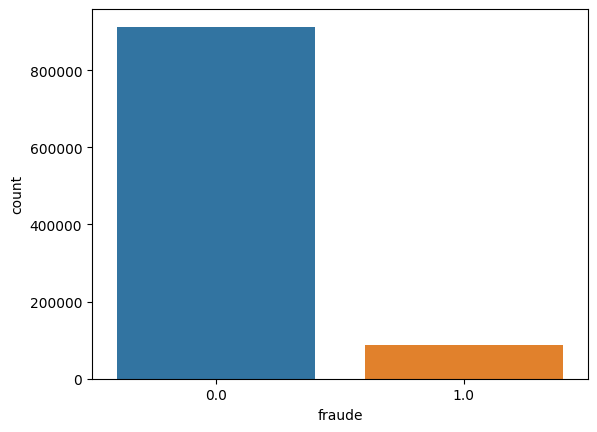

In [ ]:
# verificando se está balanceada os dados
sns.countplot(x=df['fraude']);

* **Comentário**: O gráfico mostra que essa váriavel está muito desbalanceada, sendo necessário balancear com o método abaixo.

Se as classes estiverem desbalanceadas execute o código a seguir.

Existem várias técnicas de balanceamento. Como temos muitas observações, vamos usar uma técnica chamada undersampling. Esta técnica consiste em descartar observações da classe que possui mais observações até que as duas classes tenham a mesma quantidade.

Por exemplo, se temos duas classes, uma com 1000 observações para a classe A e outra com 100 observações para a classe B, então iremos selecionar apenas 100 observações (aleatoriamente) da classe A dentre as 1000. Dessa maneira iremos ter 100 observações de cada classe.

In [ ]:
# separando as variáveis X e y
X = df[['dist_casa','dist_ultima_transacao','razao_preco_medio','loja_repetida', 'usou_chip', 'usou_pin', 'online']]
y = df['fraude']

# balanceando as classes com undersampling
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X, y = undersample.fit_resample(X, y)

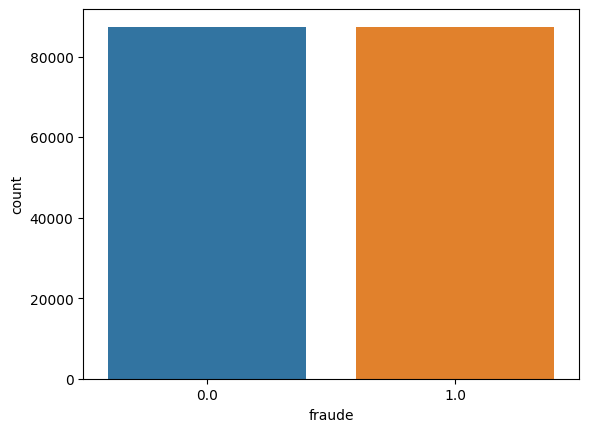

In [ ]:
# verificando se está balanceada o dado
sns.countplot(x=y);

## Atividade 4: Crie um modelo de regressão logística.

In [ ]:
# importando o statsmodels para criar o modelo de regressão logística
import statsmodels.api as sm

In [ ]:
X = sm.add_constant(X)

In [ ]:
# criando modelo de regressão logística
modelo = sm.Logit(y, X).fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.213603
         Iterations 10


## Atividade 5: Verifique os parâmetros do modelo e se eles são relevantes.

In [ ]:
# verificando parametros
modelo.params

const                    -7.570453
dist_casa                 0.028027
dist_ultima_transacao     0.050148
razao_preco_medio         1.197516
loja_repetida            -1.391959
usou_chip                -1.208123
usou_pin                -10.315033
online                    4.981359
dtype: float64

In [ ]:
# predizendo cada fraude
modelo.predict(X)

0         0.000295
1         0.002482
2         0.849195
3         0.030305
4         0.000484
            ...   
174801    0.999644
174802    0.747816
174803    0.508323
174804    1.000000
174805    0.999802
Length: 174806, dtype: float64

In [ ]:
y_pred = (modelo.predict(X) >= 0.5).astype(int)

print(modelo.summary())

                           Logit Regression Results                           
Dep. Variable:                 fraude   No. Observations:               174806
Model:                          Logit   Df Residuals:                   174798
Method:                           MLE   Df Model:                            7
Date:                Fri, 04 Aug 2023   Pseudo R-squ.:                  0.6918
Time:                        19:33:59   Log-Likelihood:                -37339.
converged:                       True   LL-Null:                   -1.2117e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -7.5705      0.053   -141.959      0.000      -7.675      -7.466
dist_casa                 0.0280      0.000    129.231      0.000       0.028       0.028
dist_ult

## Atividade 6: Crie a matriz de confusão e o mapa de calor correspondente.


In [ ]:
# gerando matrix de confusão
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y, y_pred)
matriz_confusao

array([[81412,  5991],
       [ 4475, 82928]])

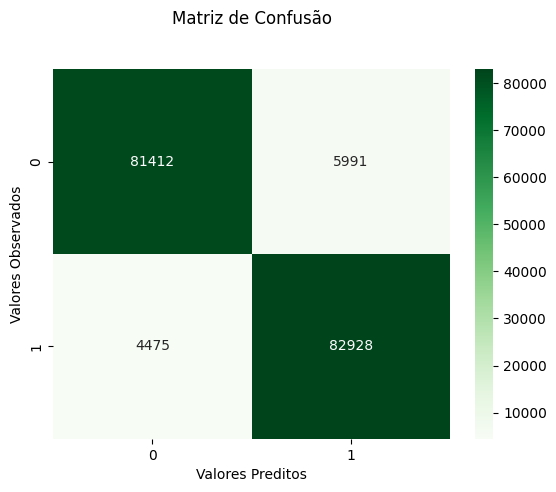

In [ ]:
# criando mapa de calor
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

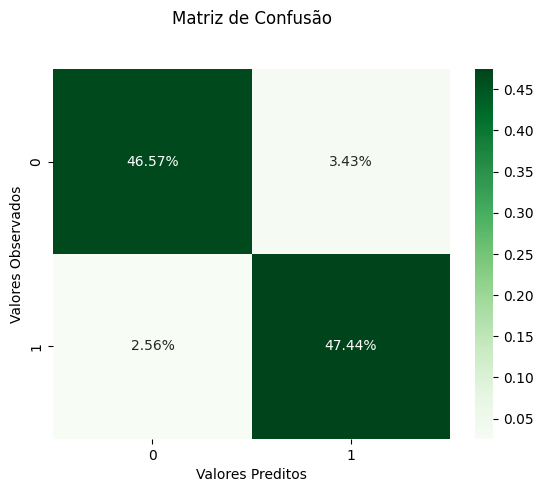

In [ ]:
# mapa de calor em porcentagem
sns.heatmap(matriz_confusao/np.sum(matriz_confusao),
            annot=True, fmt='.2%', cmap='Greens');

plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

* **Comentário:** Com o balanceamento as porcentagens ficaram bem próximas!

---



## Atividade 7: Verifique as outras métricas (sensibilidade, especificidade, f1-score).

In [ ]:
# verificando outras métricas
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     87403
         1.0       0.93      0.95      0.94     87403

    accuracy                           0.94    174806
   macro avg       0.94      0.94      0.94    174806
weighted avg       0.94      0.94      0.94    174806



* **Comentário:** Podemos ver que a acurária é de 0,86, indicando que o modelo acerta 86% da previsões.

## Atividade 8: Crie a curva ROC para este modelo.

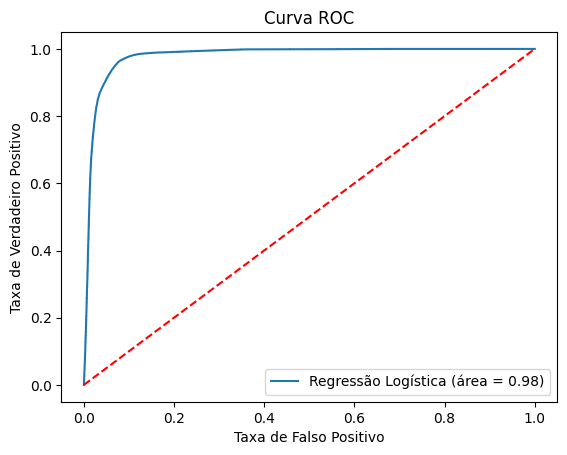

In [ ]:
# criando curva ROC
from sklearn.metrics import roc_curve, roc_auc_score

logit_roc_auc = roc_auc_score(y, modelo.predict(X))
fpr, tpr, thresholds = roc_curve(y, modelo.predict(X))
plt.plot(fpr, tpr, label=f'Regressão Logística (área = {round(logit_roc_auc, 2)})')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right");

* **Comentário:** A área é de 0.98, indicando que o modelo está excelente.

## Atividade 9: Preveja se uma transação com as características abaixo é ou não fraude.

* `dist_casa = 82`
* `dist_ultima_transacao = 13`
* `razao_preco_medio = 14`
* `loja_repetida = 1`
* `usou_chip = 0`
* `usou_pin = 0`
* `online = 1`

In [ ]:
# Transformando as características acima em um DataFrame
verifica_fraude = pd.DataFrame({
    'dist_casa': [82.0],
    'dist_ultima_transacao': [13.0],
    'razao_preco_medio': [14.0],
    'loja_repetida': [1.0],
    'usou_chip': [0.0],
    'usou_pin': [0.0],
    'online': [1.0],
}, index=[0])

# Exibindo o DataFrame das características
verifica_fraude.head()

,dist_casa,dist_ultima_transacao,razao_preco_medio,loja_repetida,usou_chip,usou_pin,online
0,82.0,13.0,14.0,1.0,0.0,0.0,1.0


In [ ]:
X.iloc[0]

const                    1.000000
dist_casa                5.700714
dist_ultima_transacao    0.066927
razao_preco_medio        0.561194
loja_repetida            1.000000
usou_chip                0.000000
usou_pin                 0.000000
online                   0.000000
Name: 0, dtype: float64

In [ ]:
verifica_fraude['const'] = 1

# Movendo a coluna 'const' para ser a primeira coluna
colunas = ['const'] + [col for col in verifica_fraude if col != 'const']
verifica_fraude = verifica_fraude[colunas]

In [ ]:
verifica_fraude.iloc[0]

const                     1.0
dist_casa                82.0
dist_ultima_transacao    13.0
razao_preco_medio        14.0
loja_repetida             1.0
usou_chip                 0.0
usou_pin                  0.0
online                    1.0
Name: 0, dtype: float64

In [ ]:
# prevendo se é fraude ou não
modelo.predict(verifica_fraude.iloc[0])

None    1.0
dtype: float64

* **Comentário:** A previsão diz que é fraude com toda certeza!

## Atividade 10: Refaça os exercícios sem realizar o balanceamento de classe e verifique se ocorre algum problema.

In [ ]:
# importando o conjunto de dados
from google.colab import drive
drive.mount('/content/drive')

df_desbalanceado = pd.read_csv('/content/drive/MyDrive/ArquivosColab/card_transdata.csv')

# renomeando as colunas
df_desbalanceado.columns = ['dist_casa','dist_ultima_transacao','razao_preco_medio',
              'loja_repetida','usou_chip','usou_pin','online','fraude']

df_desbalanceado.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,dist_casa,dist_ultima_transacao,razao_preco_medio,loja_repetida,usou_chip,usou_pin,online,fraude
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


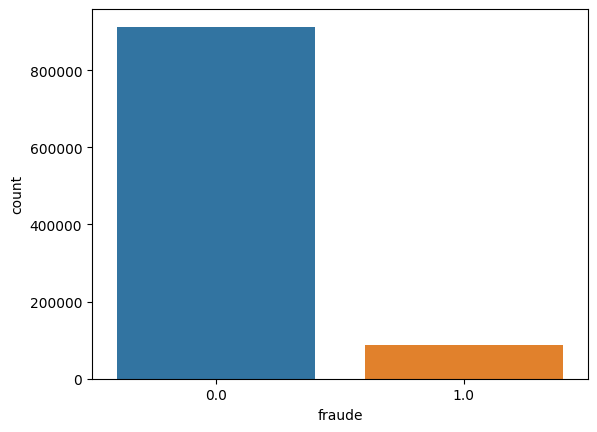

In [ ]:
# separando as variáveis X2 e y2
X2 = df_desbalanceado[['dist_casa','dist_ultima_transacao','razao_preco_medio','loja_repetida', 'usou_chip', 'usou_pin', 'online']]
y2 = df_desbalanceado['fraude']

# vai ficar desbalanceado
sns.countplot(x=y2);

In [ ]:
X2 = sm.add_constant(X2)

# criando modelo de regressão logística
modelo2 = sm.Logit(y2, X2).fit(method='newton')

print(modelo2.summary())

Optimization terminated successfully.
         Current function value: 0.135695
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                 fraude   No. Observations:              1000000
Model:                          Logit   Df Residuals:                   999992
Method:                           MLE   Df Model:                            7
Date:                Fri, 04 Aug 2023   Pseudo R-squ.:                  0.5423
Time:                        19:57:47   Log-Likelihood:            -1.3570e+05
converged:                       True   LL-Null:                   -2.9649e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -10.3611      0.044   -237.200      0.000     -10.447     -10

In [ ]:
modelo2.params

const                   -10.361061
dist_casa                 0.015217
dist_ultima_transacao     0.025258
razao_preco_medio         0.862251
loja_repetida            -0.621471
usou_chip                -1.049060
usou_pin                -13.740402
online                    6.651379
dtype: float64

In [ ]:
modelo2.predict(X2)

0         0.000078
1         0.000061
2         0.020542
3         0.007451
4         0.058587
            ...   
999995    0.000025
999996    0.000095
999997    0.005996
999998    0.020837
999999    0.015454
Length: 1000000, dtype: float64

In [ ]:
y_pred2 = (modelo2.predict(X2) >= 0.5).astype(int)

In [ ]:
# gerando matrix de confusão
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y2, y_pred2)
matriz_confusao

array([[908595,   4002],
       [ 41527,  45876]])

In [ ]:
X2.iloc[0]

const                     1.000000
dist_casa                57.877857
dist_ultima_transacao     0.311140
razao_preco_medio         1.945940
loja_repetida             1.000000
usou_chip                 1.000000
usou_pin                  0.000000
online                    0.000000
Name: 0, dtype: float64

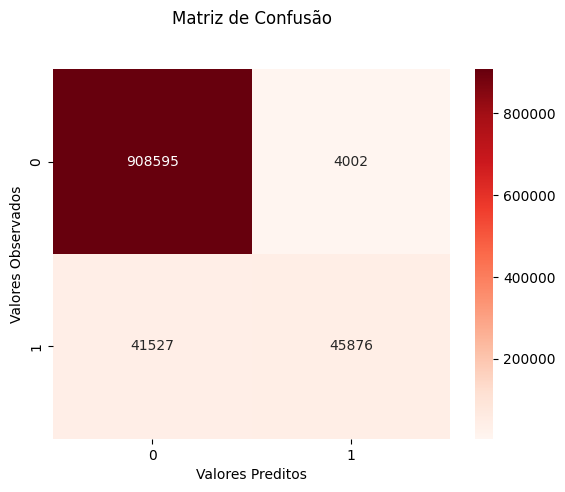

In [ ]:
# criando mapa de calor
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Reds')
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

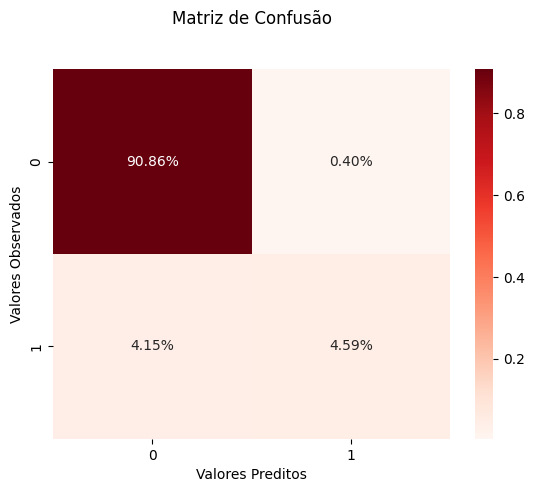

In [ ]:
# mapa de calor em porcentagem
sns.heatmap(matriz_confusao/np.sum(matriz_confusao),
            annot=True, fmt='.2%', cmap='Reds');

plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

* **Comentário:** A maior parcela está em não fraudes olhando a base inteira! O que é comum olhando o mercado no geral de transações.

In [ ]:
# verificando outras métricas
from sklearn.metrics import classification_report

print(classification_report(y2, y_pred2))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98    912597
         1.0       0.92      0.52      0.67     87403

    accuracy                           0.95   1000000
   macro avg       0.94      0.76      0.82   1000000
weighted avg       0.95      0.95      0.95   1000000



* **Comentário:** Podemos ver que a acurária é de 0,95, indicando que o modelo acerta 95% da previsões.

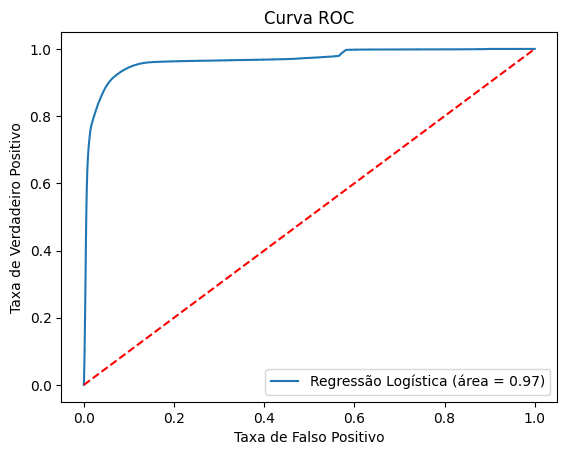

In [ ]:
# criando curva ROC
from sklearn.metrics import roc_curve, roc_auc_score

logit_roc_auc = roc_auc_score(y2, modelo2.predict(X2))
fpr, tpr, thresholds = roc_curve(y2, modelo2.predict(X2))
plt.plot(fpr, tpr, label=f'Regressão Logística (área = {round(logit_roc_auc, 2)})')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right");

* **Comentário:** A área é de 0.97, indicando que o modelo está excelente.